In [1]:
import pandas as pd
from torch.utils.data import DataLoader
import pytorch_lightning as pl
#from pytorch_lightning.profiler import Profiler, AdvancedProfiler
import HeatfluxData as hfd
import HeatfluxModel as hfm

/usr/workspace/mlmfem/anaconda3/envs/ptl_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
filename_data = f'../students/bogdaale/NN-examples/scaled_QdataKn25width100microns.csv'
# Using heat flux data module
scaled_Qdata = pd.read_csv(filename_data, header=0, index_col=0)
test_set, train_set, validation_set, vis_set = hfd.heat_flux_datasets(scaled_Qdata, 0.3, 0.8)

In [3]:
### Create data loaders
train_loader = DataLoader(dataset = train_set, batch_size = 128)
validation_loader = DataLoader(dataset = validation_set, batch_size = 128)
test_loader = DataLoader(dataset = test_set, batch_size = 128)
# Special object for visualization
vis_loader = DataLoader(dataset = vis_set, batch_size = 128)

In [4]:
### Read data sacling (generated by the data manager)
data_scaling=pd.read_csv(f'../students/bogdaale/NN-examples/data_scaling.csv', header=0, index_col=0)

In [5]:
### Create the heat flux model
Nfeatures = train_set[0][0].size()[0]# TODO: find a better way than extracting the size via Tensor
print(f'Nfeatures {Nfeatures}')
Nlayer1 = 20
Nlayer2 = 10
model = hfm.DirectModel(Nfeatures, Nlayer1, Nlayer2, data_scaling)

Nfeatures 125


In [6]:
### Let's train the beast!
trainer = pl.Trainer(max_epochs = 50)
trainer.fit(model, train_loader, validation_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name     | Type    | Params
-------------------------------------
0 | fc1      | Linear  | 2.5 K 
1 | fc2      | Linear  | 210   
2 | fc3      | Linear  | 11    
3 | mse_loss | MSELoss | 0     
-------------------------------------
2.7 K     Trainable params
0         Non-trainable params
2.7 K     Total params
0.011     Total estimated model params size (MB)


/usr/workspace/mlmfem/anaconda3/envs/ptl_env/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 64 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/usr/workspace/mlmfem/anaconda3/envs/ptl_env/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 64 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 0:  80%|███████████████████▏    | 166/208 [00:00<00:00, 168.83it/s, loss=0.0542, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 1:  80%|███████████████████▉     | 166/208 [00:00<00:00, 171.59it/s, loss=0.029, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 1:  96%|███████████████████████▉ | 199/208 [00:01<00:00, 178.52it/s, loss=0.029, v_num=39]


Epoch 2:  80%|███████████████████▏    | 166/208 [00:00<00:00, 171.51it/s, loss=0.0159, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 3:  80%|██████████████████▎    | 166/208 [00:00<00:00, 180.14it/s, loss=0.00892, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 3:  91%|█████████████████████  | 190/208 [00:01<00:00, 186.64it/s, loss=0.00892, v_num=39]


Epoch 4:  80%|██████████████████▎    | 166/208 [00:00<00:00, 183.08it/s, loss=0.00541, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 5:  80%|██████████████████▎    | 166/208 [00:00<00:00, 182.21it/s, loss=0.00342, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 5:  87%|████████████████████   | 181/208 [00:00<00:00, 185.46it/s, loss=0.00342, v_num=39]


Epoch 6:  80%|██████████████████▎    | 166/208 [00:00<00:00, 183.24it/s, loss=0.00245, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 7:  80%|██████████████████▎    | 166/208 [00:00<00:00, 183.09it/s, loss=0.00418, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 7:  83%|███████████████████    | 172/208 [00:00<00:00, 184.19it/s, loss=0.00418, v_num=39]


Epoch 8:  80%|██████████████████▎    | 166/208 [00:00<00:00, 183.18it/s, loss=0.00252, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 8: 100%|███████████████████████| 208/208 [00:01<00:00, 193.79it/s, loss=0.00252, v_num=39]


Epoch 9:  80%|██████████████████▎    | 166/208 [00:00<00:00, 180.48it/s, loss=0.00211, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 10:  80%|█████████████████▌    | 166/208 [00:00<00:00, 182.99it/s, loss=0.00136, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 10:  96%|█████████████████████ | 199/208 [00:01<00:00, 193.37it/s, loss=0.00136, v_num=39]


Epoch 11:  80%|█████████████████▌    | 166/208 [00:00<00:00, 181.94it/s, loss=0.00112, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 12:  80%|████████████████▊    | 166/208 [00:00<00:00, 180.90it/s, loss=0.000757, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 12:  91%|███████████████████▏ | 190/208 [00:01<00:00, 187.33it/s, loss=0.000757, v_num=39]


Epoch 13:  80%|████████████████▊    | 166/208 [00:00<00:00, 180.48it/s, loss=0.000654, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 14:  80%|████████████████▊    | 166/208 [00:00<00:00, 182.02it/s, loss=0.000567, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 14:  87%|██████████████████▎  | 181/208 [00:00<00:00, 185.24it/s, loss=0.000567, v_num=39]


Epoch 15:  80%|████████████████▊    | 166/208 [00:00<00:00, 180.60it/s, loss=0.000482, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 16:  80%|████████████████▊    | 166/208 [00:00<00:00, 179.77it/s, loss=0.000393, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 16:  83%|█████████████████▎   | 172/208 [00:00<00:00, 180.73it/s, loss=0.000393, v_num=39]


Epoch 17:  80%|████████████████▊    | 166/208 [00:00<00:00, 182.41it/s, loss=0.000363, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 17: 100%|█████████████████████| 208/208 [00:01<00:00, 195.18it/s, loss=0.000363, v_num=39]


Epoch 18:  80%|████████████████▊    | 166/208 [00:00<00:00, 181.66it/s, loss=0.000335, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 19:  80%|█████████████████▌    | 166/208 [00:00<00:00, 183.38it/s, loss=0.00032, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 19:  96%|█████████████████████ | 199/208 [00:01<00:00, 193.27it/s, loss=0.00032, v_num=39]


Epoch 20:  80%|████████████████▊    | 166/208 [00:00<00:00, 180.74it/s, loss=0.000323, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 21:  80%|████████████████▊    | 166/208 [00:00<00:00, 174.92it/s, loss=0.000303, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 21:  91%|███████████████████▏ | 190/208 [00:01<00:00, 181.94it/s, loss=0.000303, v_num=39]


Epoch 22:  80%|████████████████▊    | 166/208 [00:00<00:00, 180.44it/s, loss=0.000282, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 23:  80%|████████████████▊    | 166/208 [00:00<00:00, 181.86it/s, loss=0.000275, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 23:  87%|██████████████████▎  | 181/208 [00:00<00:00, 185.42it/s, loss=0.000275, v_num=39]


Epoch 24:  80%|████████████████▊    | 166/208 [00:00<00:00, 181.10it/s, loss=0.000262, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 25:  80%|████████████████▊    | 166/208 [00:00<00:00, 183.96it/s, loss=0.000256, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 25:  83%|█████████████████▎   | 172/208 [00:00<00:00, 185.22it/s, loss=0.000256, v_num=39]


Epoch 26:  80%|████████████████▊    | 166/208 [00:00<00:00, 178.14it/s, loss=0.000244, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 26: 100%|█████████████████████| 208/208 [00:01<00:00, 190.38it/s, loss=0.000244, v_num=39]


Epoch 27:  80%|████████████████▊    | 166/208 [00:00<00:00, 180.20it/s, loss=0.000237, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 28:  80%|████████████████▊    | 166/208 [00:00<00:00, 180.07it/s, loss=0.000232, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 28:  96%|████████████████████ | 199/208 [00:01<00:00, 189.81it/s, loss=0.000232, v_num=39]


Epoch 29:  80%|████████████████▊    | 166/208 [00:00<00:00, 181.09it/s, loss=0.000225, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 30:  80%|████████████████▊    | 166/208 [00:00<00:00, 180.94it/s, loss=0.000215, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 30:  91%|███████████████████▏ | 190/208 [00:01<00:00, 186.69it/s, loss=0.000215, v_num=39]


Epoch 31:  80%|█████████████████▌    | 166/208 [00:00<00:00, 179.35it/s, loss=0.00021, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 32:  80%|████████████████▊    | 166/208 [00:00<00:00, 182.98it/s, loss=0.000207, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 32:  87%|██████████████████▎  | 181/208 [00:00<00:00, 188.08it/s, loss=0.000207, v_num=39]


Epoch 33:  80%|████████████████▊    | 166/208 [00:00<00:00, 181.79it/s, loss=0.000202, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 34:  80%|████████████████▊    | 166/208 [00:00<00:00, 182.50it/s, loss=0.000198, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 34:  83%|█████████████████▎   | 172/208 [00:00<00:00, 183.90it/s, loss=0.000198, v_num=39]


Epoch 35:  80%|████████████████▊    | 166/208 [00:00<00:00, 180.60it/s, loss=0.000196, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 35: 100%|█████████████████████| 208/208 [00:01<00:00, 191.12it/s, loss=0.000196, v_num=39]


Epoch 36:  80%|█████████████████▌    | 166/208 [00:00<00:00, 183.55it/s, loss=0.00019, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 37:  80%|████████████████▊    | 166/208 [00:00<00:00, 181.60it/s, loss=0.000186, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 37:  96%|████████████████████ | 199/208 [00:01<00:00, 192.12it/s, loss=0.000186, v_num=39]


Epoch 38:  80%|████████████████▊    | 166/208 [00:00<00:00, 180.09it/s, loss=0.000185, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 39:  80%|████████████████▊    | 166/208 [00:00<00:00, 181.11it/s, loss=0.000181, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 39:  91%|███████████████████▏ | 190/208 [00:01<00:00, 187.34it/s, loss=0.000181, v_num=39]


Epoch 40:  80%|████████████████▊    | 166/208 [00:00<00:00, 181.12it/s, loss=0.000176, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 41:  80%|████████████████▊    | 166/208 [00:00<00:00, 183.68it/s, loss=0.000172, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 41:  87%|██████████████████▎  | 181/208 [00:00<00:00, 187.02it/s, loss=0.000172, v_num=39]


Epoch 42:  80%|████████████████▊    | 166/208 [00:00<00:00, 180.80it/s, loss=0.000166, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 43:  80%|████████████████▊    | 166/208 [00:00<00:00, 176.97it/s, loss=0.000163, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 43:  83%|█████████████████▎   | 172/208 [00:00<00:00, 177.90it/s, loss=0.000163, v_num=39]


Epoch 44:  80%|████████████████▊    | 166/208 [00:00<00:00, 180.12it/s, loss=0.000161, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 44: 100%|█████████████████████| 208/208 [00:01<00:00, 194.22it/s, loss=0.000161, v_num=39]


Epoch 45:  80%|████████████████▊    | 166/208 [00:00<00:00, 182.24it/s, loss=0.000157, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 46:  80%|████████████████▊    | 166/208 [00:00<00:00, 181.82it/s, loss=0.000154, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 46:  96%|████████████████████ | 199/208 [00:01<00:00, 190.54it/s, loss=0.000154, v_num=39]


Epoch 47:  80%|████████████████▊    | 166/208 [00:00<00:00, 181.31it/s, loss=0.000151, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 48:  80%|████████████████▊    | 166/208 [00:00<00:00, 182.95it/s, loss=0.000148, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 48:  91%|███████████████████▏ | 190/208 [00:01<00:00, 189.66it/s, loss=0.000148, v_num=39]


Epoch 49:  80%|████████████████▊    | 166/208 [00:00<00:00, 180.20it/s, loss=0.000144, v_num=39]
Validation: 0it [00:00, ?it/s]
Epoch 49: 100%|█████████████████████| 208/208 [00:01<00:00, 190.05it/s, loss=0.000144, v_num=39]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|█████████████████████| 208/208 [00:01<00:00, 189.50it/s, loss=0.000144, v_num=39]


In [7]:
### Test the beast
# Get model prediction of heat flux values from visualization data set vis_set
values_prediction = model.heatflux_model(vis_set[:][0])
# Get actual heat flux values from data using bask scaling
mean = data_scaling['Qimpact']['mean']
std = data_scaling['Qimpact']['std']
values_actual = vis_set[:][1] * std + mean
# Convert to numpy ndarray
values_prediction = values_prediction.detach().numpy()
values_actual = values_actual.detach().numpy()

In [8]:
# Add local flux evaluation
model = hfm.AlphacModel(Nfeatures, Nlayer1, Nlayer2, data_scaling)
values_local = model.heatflux_model(vis_set[:][0])
values_local = values_local.detach().numpy()

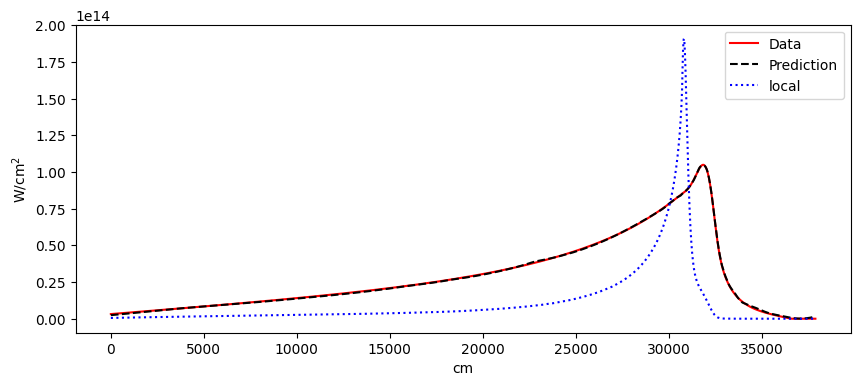

In [9]:
from matplotlib import pyplot as plt
# And finally we can see that our network has done a decent job of estimating!
fig1, ax1 = plt.subplots(figsize=(10,4))
ax1.plot(values_actual, 'r', label='Data')
ax1.plot(values_prediction, 'k--', label='Prediction')
ax1.plot(values_local, 'b:', label='local')
ax1.set_xlabel('cm')
ax1.set_ylabel('W/cm$^2$')
ax1.legend()